# <center> Stock price forecast - ARIMA

### What is a Stock price?
Companies that become public, which means those which the general puclic can invest onto, are divided in small fractions that are called shares. Those shares are available for purchase in the form of investment, and the price of each share varies depending on the revenue of said company, the amount of shares at the public disposal, the stability of the companie's finances, industry trends and so on... The more the shares are purchased the higher the price of each share becomes, following the the supply and demand logic. The opposite is also true. This could be affected though by poor management of the company, an economical recession, and a few other factors that are generally not the norm.
In other words, a Stock price is the value of the public sentiment towards publicly traded companies.

In this notebook we aim at analizing and forecasting the stock price of some of the most prominent companies in the Stock Market and some of the most known in the world. They are: Apple; Amazon; Google; Netflix; Nvidia and Tesla.

#### What is ARIMA?
Auto Regressive Integrated Moving Average (ARIMA) is a statistical methode used for time-series analysis and forecasting. It converts non-stationary data into stationary, and it's a very robust model that is used extensively in fields such as finance, economics, and for forecasting anything that happens thorughout a continuous period of time.

In [1]:
# import libraries
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [2]:
# import the data 
aapl_df = pd.read_csv(r"C:\Users\vitor\Documents\Brainstation\Capstone\Data\AAPL.csv") # Apple
amzn_df = pd.read_csv(r"C:\Users\vitor\Documents\Brainstation\Capstone\Data\AMZN.csv") # Amazon
googl_df = pd.read_csv(r"C:\Users\vitor\Documents\Brainstation\Capstone\Data\GOOGL.csv") # Google
nflx_df = pd.read_csv(r"C:\Users\vitor\Documents\Brainstation\Capstone\Data\NFLX.csv") # Netflix
nvda_df = pd.read_csv(r"C:\Users\vitor\Documents\Brainstation\Capstone\Data\NVDA.csv") # Nvidia
tsla_df = pd.read_csv(r"C:\Users\vitor\Documents\Brainstation\Capstone\Data\TSLA.csv") # Tesla

In [14]:
# visualize the structure of the dataframe
tsla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


This data goes from January 2009 until December of 2023 (The start date is the same for all dataframes but Tesla) with 7 features recorded in all of them:
- **Date** indicates the specific day when the stock was traded.
- **Open** means the price which the stock started being traded as the moment the trading day began.
- **High/Low** represents, respectively, the highest and lowest intra day price of the stock.
- **Close** indicates the price of the stock at the moment the trading day ended.
- **Adj Close** (Adjusted Close) reflects the actual price of the stock corporate actions, such as payment of dividends.
- **Volume** signifies the amount of trades that happened during the specified period (daily in this case).

In [4]:
# look at the shape of the data (rows and columns, respectively)
print(aapl_df.shape)
print(amzn_df.shape)
print(googl_df.shape)
print(nflx_df.shape)
print(nvda_df.shape)
print(tsla_df.shape)

(3762, 7)
(3762, 7)
(3762, 7)
(3762, 7)
(3762, 7)
(3388, 7)


In order to plot the data into charts I am going to index the dataframe based on their 'Date' column, using a function from pandas `to_datetime`

In [5]:
# changing the indexes of the dataframes using the pandas function 'to_datetime'
# Apple
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
aapl_df = aapl_df.set_index('Date')
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.863342,1181608400
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.816114,1289310400
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.755262,753048800
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.806425,673500800
2009-01-09,3.328929,3.335000,3.219286,3.235000,2.742244,546845600


In [6]:
# Amazon
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])
amzn_df = amzn_df.set_index('Date')
# Google
googl_df['Date'] = pd.to_datetime(googl_df['Date'])
googl_df = googl_df.set_index('Date')
# Netflix
nflx_df['Date'] = pd.to_datetime(nflx_df['Date'])
nflx_df = nflx_df.set_index('Date')
# Nvidia
nvda_df['Date'] = pd.to_datetime(nvda_df['Date'])
nvda_df = nvda_df.set_index('Date')
# Tesla
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])
tsla_df = tsla_df.set_index('Date')

print(amzn_df.head(2))
print(googl_df.head(2))
print(nflx_df.head(2))
print(nvda_df.head(2))
print(tsla_df.head(2))

              Open   High     Low  Close  Adj Close     Volume
Date                                                          
2009-01-05  2.7865  2.787  2.6515  2.703      2.703  190196000
2009-01-06  2.7275  2.911  2.6875  2.868      2.868  221602000
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2009-01-05  8.033033  8.289289  7.882883  8.209459   8.209459  195364440
2009-01-06  8.332833  8.528529  8.167918  8.359860   8.359860  256750992
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2009-01-05  4.327143  4.562857  4.302857  4.562857   4.562857  13044500
2009-01-06  4.591429  4.750000  4.590000  4.705714   4.705714  12065900
              Open    High     Low   Close  Adj Close    Volume
Date                                                           
2009-01-05  2.1525  2.2675  2.1375  2.21

We are ready to take a first look into our charts using `matplotlib`

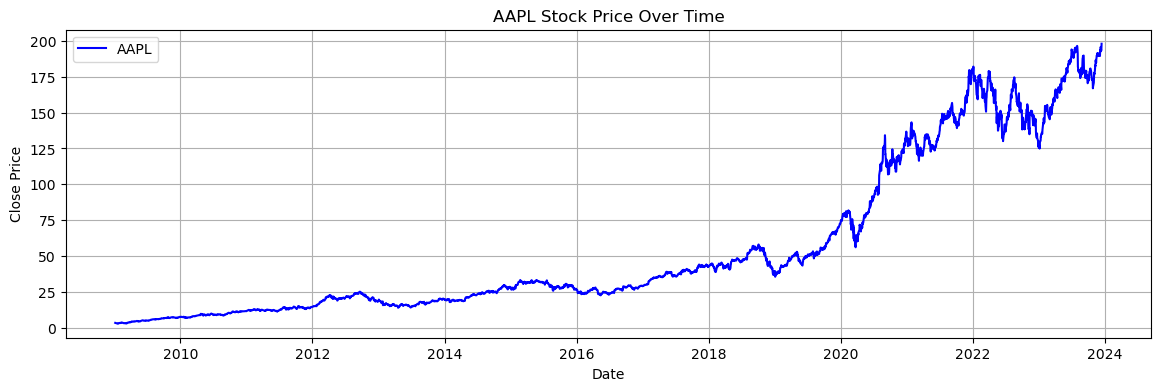

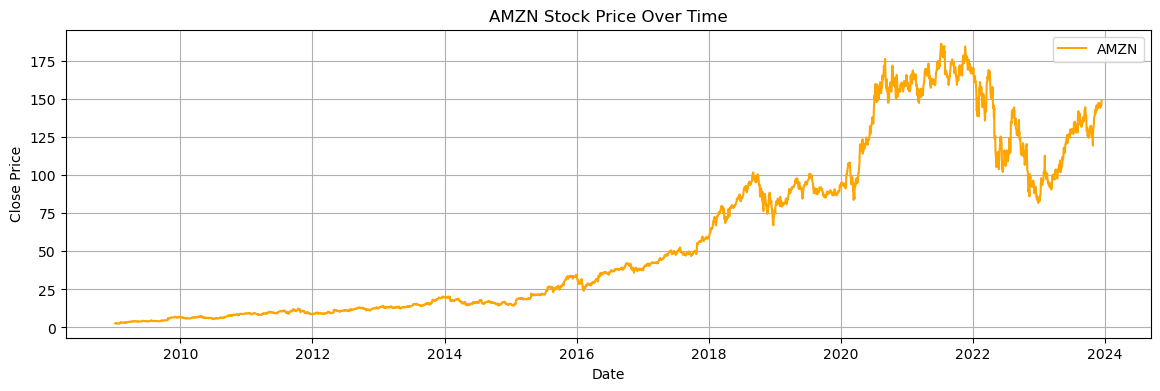

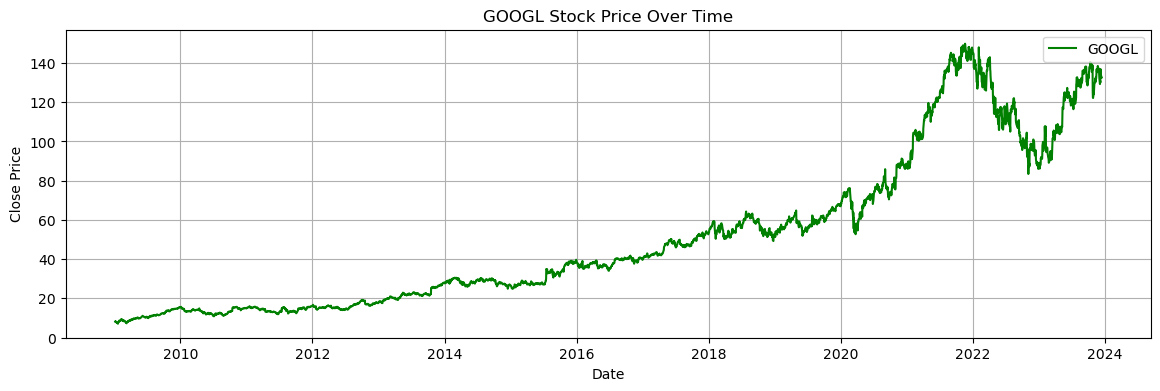

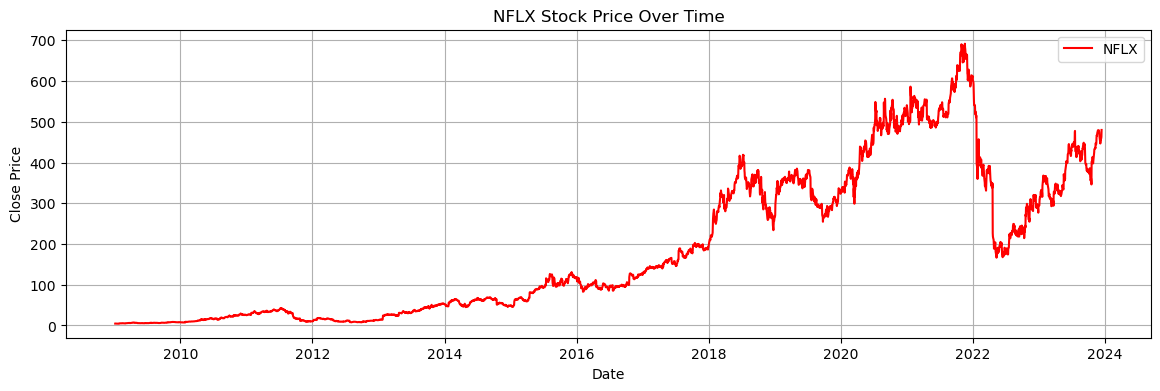

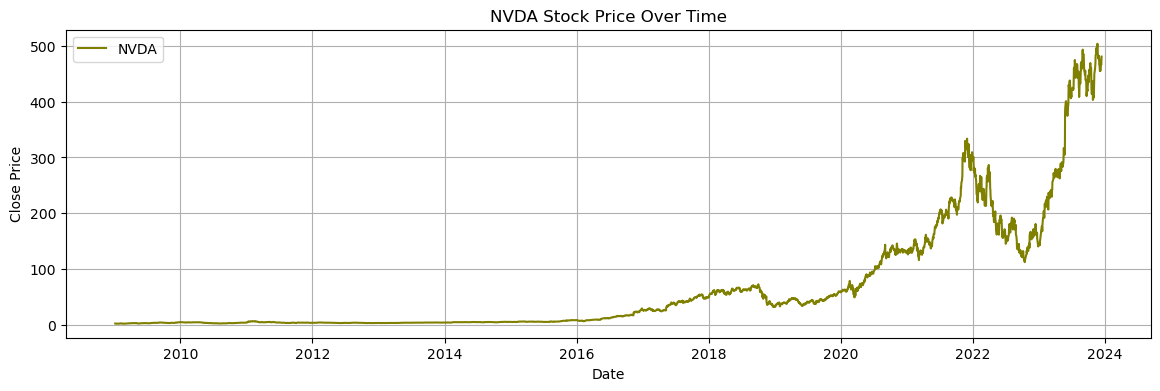

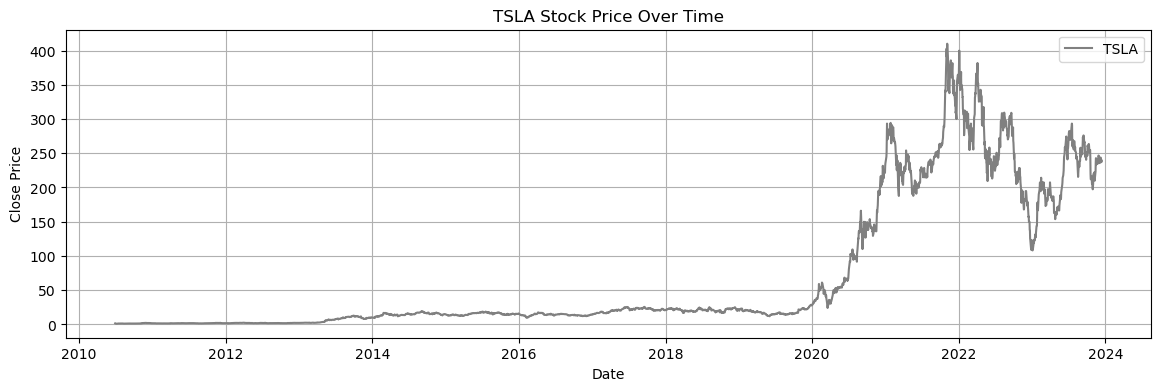

In [7]:
# visualize the charts for each stock
# Apple
plt.figure(figsize=(14, 4))
plt.plot(aapl_df['Close'], label='AAPL', color='blue')

plt.title('AAPL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Amazon
plt.figure(figsize=(14, 4))
plt.plot(amzn_df['Close'], label='AMZN', color='orange')

plt.title('AMZN Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Google
plt.figure(figsize=(14, 4))
plt.plot(googl_df['Close'], label='GOOGL', color='green')

plt.title('GOOGL Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Netflix
plt.figure(figsize=(14, 4))
plt.plot(nflx_df['Close'], label='NFLX', color='red')

plt.title('NFLX Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Nvidia
plt.figure(figsize=(14, 4))
plt.plot(nvda_df['Close'], label='NVDA', color='olive')

plt.title('NVDA Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

# Tesla
plt.figure(figsize=(14, 4))
plt.plot(tsla_df['Close'], label='TSLA', color='gray')

plt.title('TSLA Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

## Missing values and dates

Despite believeing the data is perfectly clean, we'll perform a quick analysis to make sure there are absolutely no missing dates and/or values. Due to the nature of stock trading, there will be missing dates for Saturdays, Sundays and Holidays, days which the stock market is closed, so we'll account for that an delete these rows if they exist. 

From here on we'll do our due dilligence on the Apple stock and apply the concepts to the other stocks, considering that they all follow the same data parameter which is mandatory in publicly traded stocks.

In [8]:
# check for missing values
aapl_df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no missing values.

In [10]:
first_day = aapl_df.index.min()
last_day = aapl_df.index.max()

full_range = pd.date_range(start=first_day, end=last_day, freq="D")
tsla_index = pd.date_range(start='2010-06-30', end=tsla_df.index[-1], freq='D')

full_range.difference(aapl_df.index)

DatetimeIndex(['2009-01-10', '2009-01-11', '2009-01-17', '2009-01-18',
               '2009-01-19', '2009-01-24', '2009-01-25', '2009-01-31',
               '2009-02-01', '2009-02-07',
               ...
               '2023-11-12', '2023-11-18', '2023-11-19', '2023-11-23',
               '2023-11-25', '2023-11-26', '2023-12-02', '2023-12-03',
               '2023-12-09', '2023-12-10'],
              dtype='datetime64[ns]', length=1694, freq=None)

In [11]:
first_day, last_day

(Timestamp('2009-01-05 00:00:00'), Timestamp('2023-12-13 00:00:00'))

There are 1694 days missing from our dataset over the periods of 2009-01-05 and 2023-12-13. We have 3762 days recorded.

To proceed, I decided to fill the missing dates so we have a very consistence time series with daily values.

In [12]:
# reindex the data
# Apple
aapl_df_clean = aapl_df.reindex(full_range)
# Amazon
amzn_df_clean = amzn_df.reindex(full_range)
# Google
googl_df_clean = googl_df.reindex(full_range)
# Netflix
nflx_df_clean = nflx_df.reindex(full_range)
# Nvidia
nvda_df_clean = nvda_df.reindex(full_range)
# Tesla
tsla_df_clean = tsla_df.reindex()


In [13]:
# check if the new dates were indexed
aapl_df_clean.head(20)

,Open,High,Low,Close,Adj Close,Volume
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.863342,1.181608e+09
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.816114,1.289310e+09
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.755262,7.530488e+08
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.806425,6.735008e+08
2009-01-09,3.328929,3.335000,3.219286,3.235000,2.742244,5.468456e+08
2009-01-10,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-11,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-12,3.230714,3.249643,3.126786,3.166429,2.684118,6.177164e+08
2009-01-13,3.151429,3.205000,3.083929,3.132500,2.655356,7.983976e+08
2009-01-14,3.080000,3.116071,3.025714,3.047500,2.583303,1.021664e+09


In [ ]:
# observe if the number of null values changes since we created new rows
aapl_df_clean.isna().sum()

In [ ]:
# fill sequences of 2 consecutive days with a rolling averave. This should take care of all weekends.
window_size = 3
# Apple
aapl_df_clean = aapl_df_clean.rolling(window=window_size, min_periods=1).mean().round(6)
# Amazon
amzn_df_clean = amzn_df_clean.rolling(window=window_size, min_periods=1).mean().round(6)
# Google
googl_df_clean = googl_df_clean.rolling(window=window_size, min_periods=1).mean().round(6)
# Netflix
nflx_df_clean = nflx_df_clean.rolling(window=window_size, min_periods=1).mean().round(6)
# Nvidia
nvda_df_clean = nvda_df_clean.rolling(window=window_size, min_periods=1).mean().round(6)
# Tesla
tsla_df_clean = tsla_df_clean.rolling(window=window_size, min_periods=1).mean().round(6)

In [ ]:
# check if there are any null values left
tsla_df_clean.isna().sum()

We still have 104 Null values. We are going to visualize how distante these null values are from each other to determine the best way to deal with them.

In [ ]:
# visualize the distribution of the null values throughout our dataframe
plt.figure(figsize=(25, 5))
ax = sns.heatmap(aapl_df_clean.isna().T, cmap="tab10", cbar="False")
ax.set(xticklabels=[])

plt.show()

Since the null values are distant and well distributed in the extension of our dataframe, We will use `forward fill` to populate these rows.

In [ ]:
# fill the missing values using forward fill
# Apple
aapl_df_clean = aapl_df_clean.fillna(method="ffill")
# Amazon
amzn_df_clean = amzn_df_clean.fillna(method="ffill")
# Google
googl_df_clean = googl_df_clean.fillna(method="ffill")
# Netflix
nflx_df_clean = nflx_df_clean.fillna(method="ffill")
# Nvidia
nvda_df_clean = nvda_df_clean.fillna(method="ffill")
# Tesla
tsla_df_clean = tsla_df_clean.fillna(method="ffill")

In [ ]:
# cheack if there are any missing values still. Substitute the dataframe as needed.
aapl_df_clean.isna().sum()

## Trend-Seasonal Decomposition

Now that we made sure to not having missing values/dates in our dataset, we'll move on to decompose it in order to analyse the trend, seasonality and residuals from our charts.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.figure(figsize=(12, 5))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(aapl_df_clean['Close'])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposition = tsa.seasonal_decompose(aapl_df_clean["Close"], model = 'additive')

In [ ]:
type(decomposition)

In [ ]:
aapl_df_clean["Trend"] = decomposition.trend
aapl_df_clean["Seasonal"] = decomposition.seasonal
aapl_df_clean["Residual"] = decomposition.resid

aapl_df_clean.head(10)

In [ ]:
plt.rcParams['figure.figsize'] = (11, 9)
decomposed_aapl = sm.tsa.seasonal_decompose(aapl_df_clean["Close"],period=360)
figure = decomposed_aapl.plot()
plt.show()

## Forecasting using Time-Series

In [ ]:
plt.rcParams['figure.figsize'] = 10, 6
aapl_close_log = np.log(aapl_close)
moving_avg = aapl_close_log.rolling(12).mean()
std_dev = aapl_close_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [ ]:
train_size = 0.8
train = aapl_close[:split_index]
test = aapl_close[split_index:]

# Calculate the index to split the data
split_index = int(len(aapl_close) * train_size)

# Split the data into train and test sets
train_data, test_data = aapl_close[:split_index], aapl_close[split_index:]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(aapl_close, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [ ]:
model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Fit SARIMAX(3, 1, 0) model
order = (3, 1, 0)
model = SARIMAX(train, order=order)
results = model.fit()

# Make predictions on the test set
predictions = results.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(test, predicted_mean)
print(f"Mean Squared Error: {mse}")

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(predicted_mean, label='Predicted', color='red')
plt.legend()
plt.title(f'SARIMAX({order}) Model: Actual vs. Predicted')
plt.show()